In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import env

In [2]:
query = "select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips from properties_2017 left join propertylandusetype using (propertylandusetypeid) where propertylandusedesc = 'Single Family Residential'"

In [3]:
url = env.get_db_url('zillow')

In [4]:
df = pd.read_sql(query, url)

In [5]:
df.shape

(2152863, 7)

In [6]:
df.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [7]:
# dropping na for all since they most na is less than 1%
df = df.dropna()

In [8]:
df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

In [9]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [10]:
df.sample(5)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1940477,3.0,1.0,993.0,65596.0,1944.0,820.39,6037.0
1698841,3.0,1.5,1326.0,76457.0,1955.0,1365.24,6059.0
1822993,2.0,2.0,1432.0,201297.0,1929.0,2493.86,6037.0
1910155,3.0,2.0,1456.0,46755.0,1931.0,656.34,6037.0
1044510,2.0,2.5,1449.0,1569989.0,1983.0,17926.34,6111.0


In [11]:
df['taxvaluedollarcnt'].value_counts()

taxvaluedollarcnt
450000.0    820
500000.0    774
400000.0    723
430000.0    690
440000.0    683
           ... 
729523.0      1
940139.0      1
545367.0      1
38804.0       1
536061.0      1
Name: count, Length: 588178, dtype: int64

In [12]:
# creating list to turn into int
col = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'fips']

In [13]:
df[col] = df[col].astype(int)

In [14]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                       int64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                              int64
dtype: object

In [15]:
import wrangle as w

In [16]:
train, validate, test, df = w.wrangle_zillow()

In [17]:
df.shape, train.shape, validate.shape, test.shape

((2140235, 7), (1284141, 7), (428047, 7), (428047, 7))

In [18]:
train.head()

,bedrooms,bathrooms,area,appraisal,yearbuilt,tax,county
462820,5,4.0,3011,710674.0,2005,7561.14,Ventura
3880,3,2.0,1682,603333.0,1961,7086.19,LA
992263,4,2.0,1433,82804.0,1954,1134.83,LA
311722,3,2.5,2001,355444.0,1999,4174.92,Ventura
787985,4,2.0,2277,571000.0,1962,7113.02,LA


In [19]:
lnplot = train.drop(columns='taxvalue')

KeyError: "['taxvalue'] not found in axis"

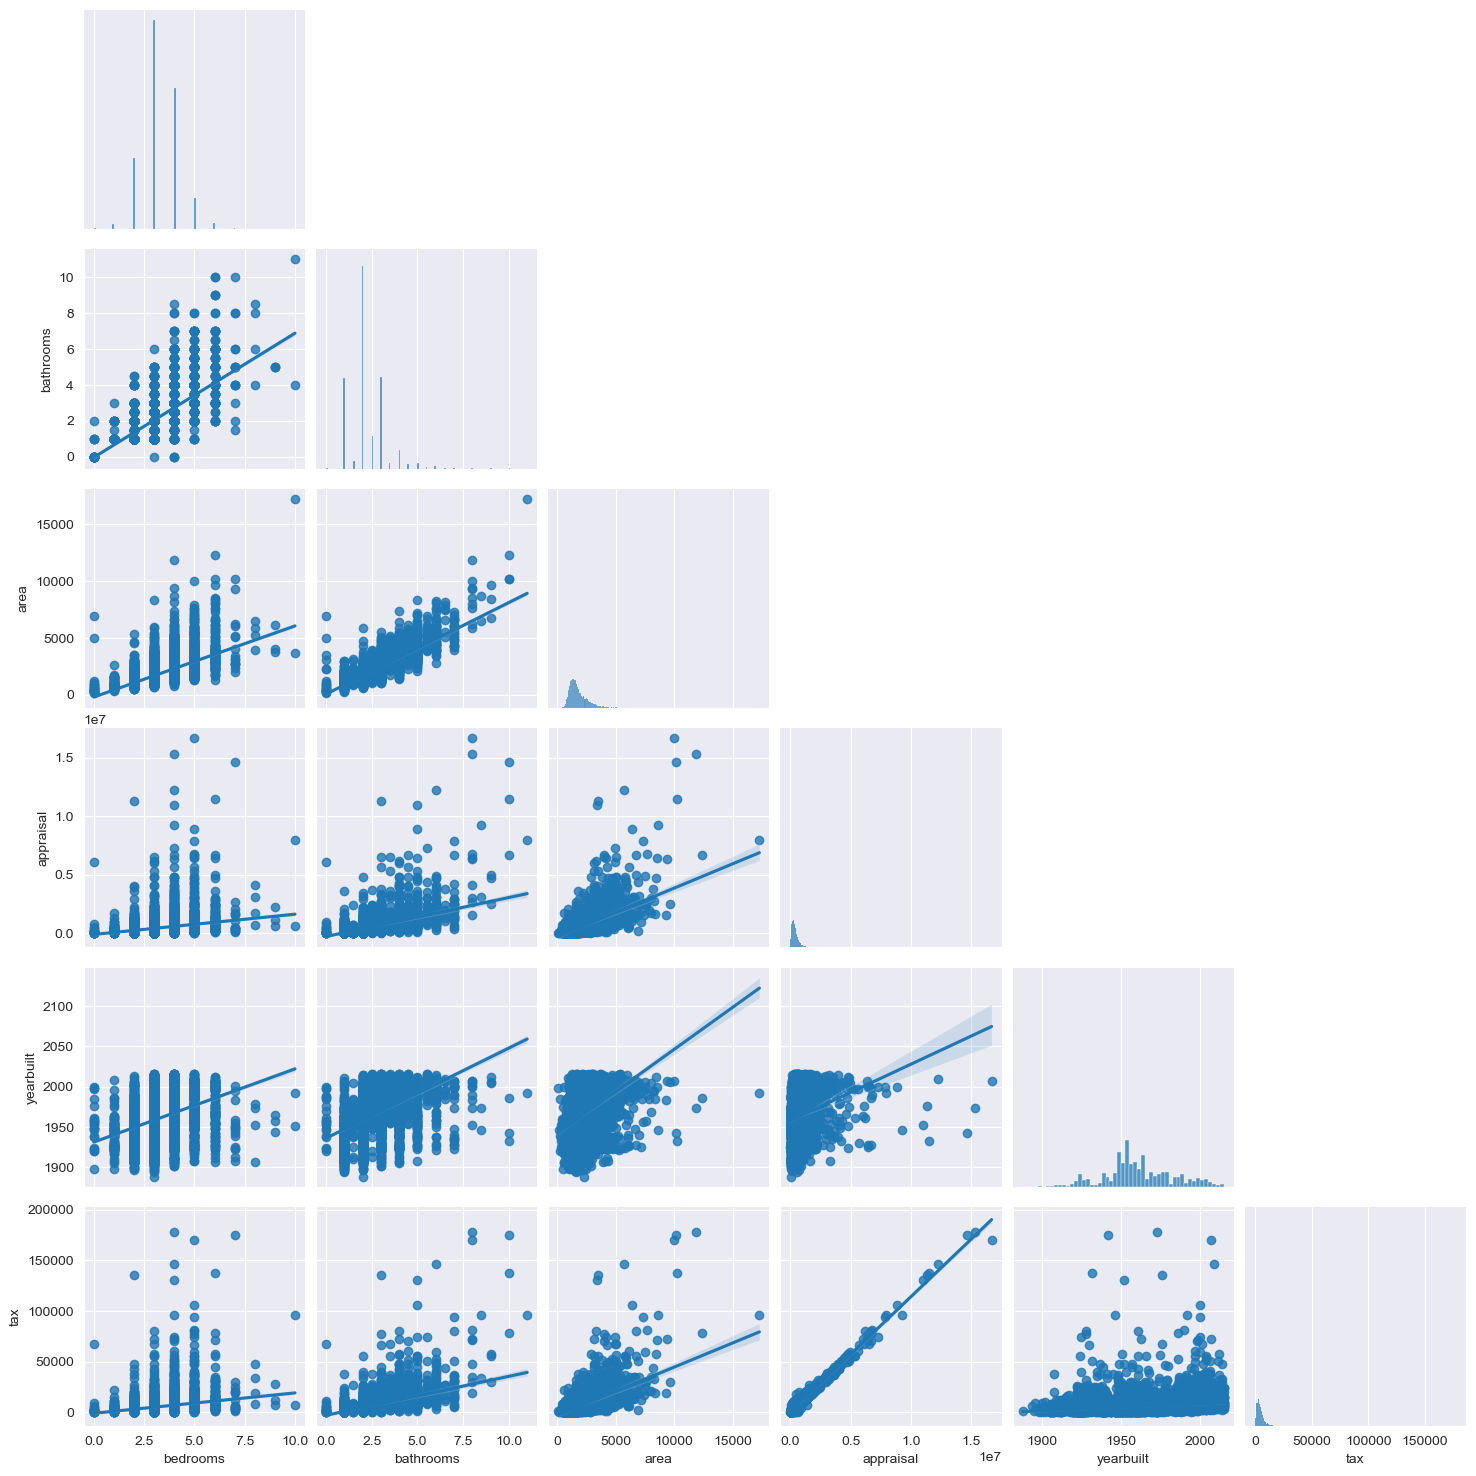

In [23]:
sns.pairplot(train.sample(10000), corner=True, kind='reg')
plt.show()

In [82]:
def plot_variable_pairs(df):
    """
    this function takes in a dataframe and prints out a pairplot and
    by only taking 10000 row sample for efficiency.
    
    parameters
        any dataframe
    return 
        a pair plot of the variables
    """
    sns.pairplot(df.sample(10000), corner=True, kind='reg')
    
plt.show()

In [24]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'appraisal', 'yearbuilt', 'tax',
       'county'],
      dtype='object')

In [25]:
train_cat = ['county']

In [71]:
train_cont = train[['bedrooms', 'bathrooms', 'area', 'appraisal', 'tax', 'yearbuilt']]


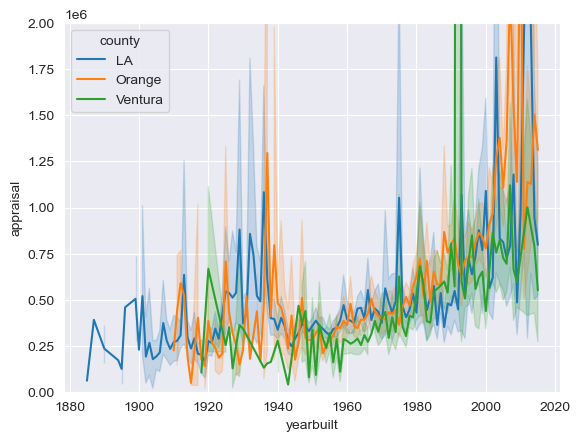

In [55]:
# cont - cont graph
sns.lineplot(train.sample(10000), x='yearbuilt', y='appraisal', hue='county')
plt.ylim(0,2000000)
plt.show()

In [87]:
corrs = train_cont.corr(method='spearman')

<Axes: >

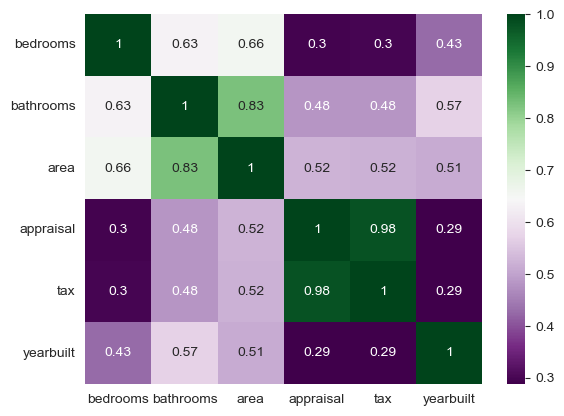

In [88]:
# seeint the correlation between each continous variable
sns.heatmap(corrs, cmap='PRGn', annot=True)

In [78]:
ttrain = train.drop('appraisal', axis=1)

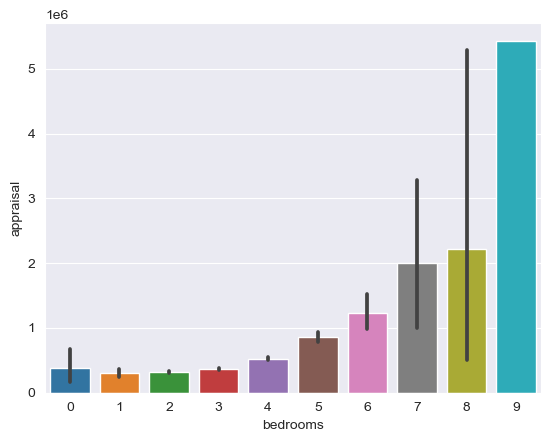

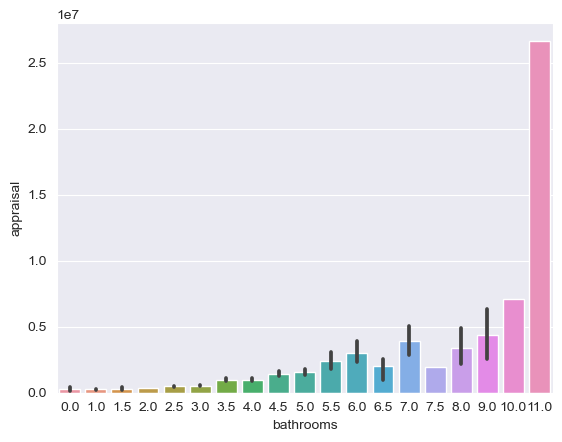

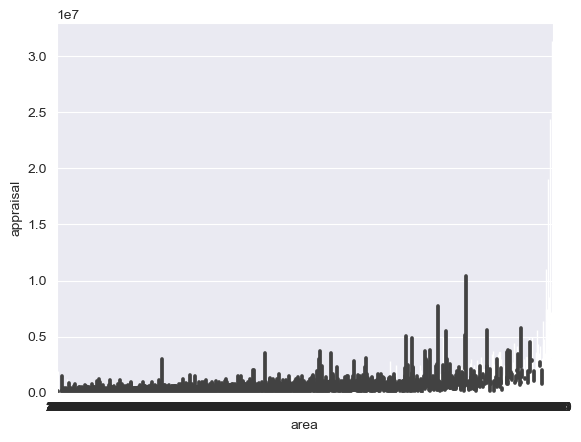

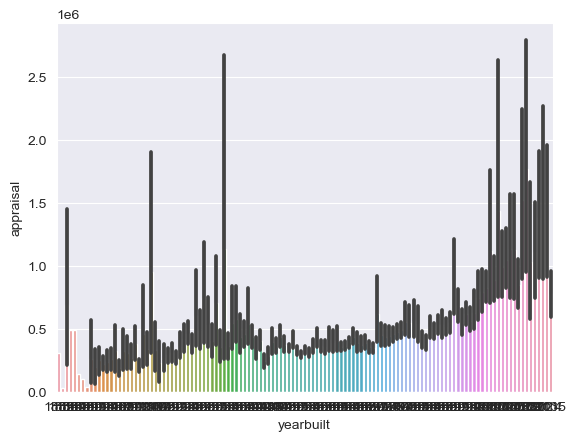

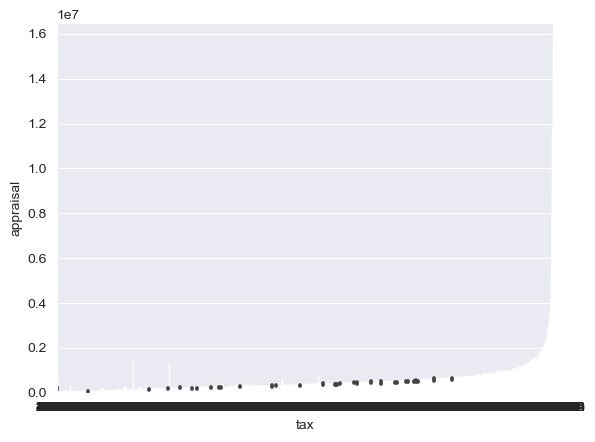

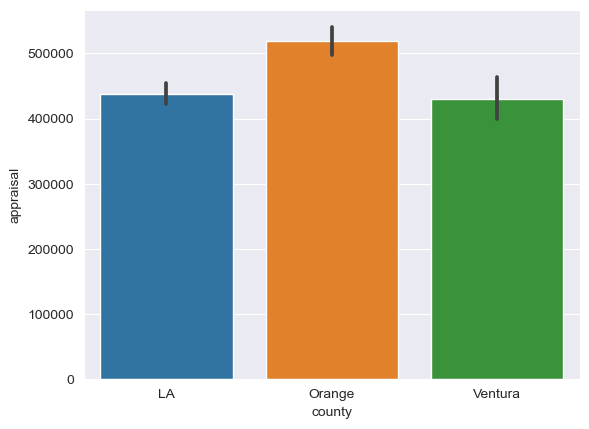

In [91]:
for var in ttrain.columns:
    sns.barplot(train.sample(10000), x=var, y='appraisal')
    plt.show()

In [94]:
def plot_categorical_and_continuous_vars(train):
    """
    this function takes in a dataframe and displays different visuals to help 
    visualize correlations between different variables in the zillow df
    
    parameters
        train df
    output
        visuals
    """
    # creating 2 variable continuous and categorical
    train_cat = ['county']
    train_cont = train[['bedrooms', 'bathrooms', 'area', 'appraisal', 'tax', 'yearbuilt']]
    
    # creating a line plot
    sns.lineplot(train.sample(10000), x='yearbuilt', y='appraisal', hue='county')
    plt.ylim(0,2000000)
    plt.show()
    
    corrs = train_cont.corr(method='spearman')
    # seeing the correlation between each continuous variable
    sns.heatmap(corrs, cmap='PRGn', annot=True)
    plt.show()
    
    ttrain = train.drop('appraisal', axis=1)
    
    for var in ttrain.columns:
        sns.barplot(train.sample(10000), x=var, y='appraisal')
        plt.show()


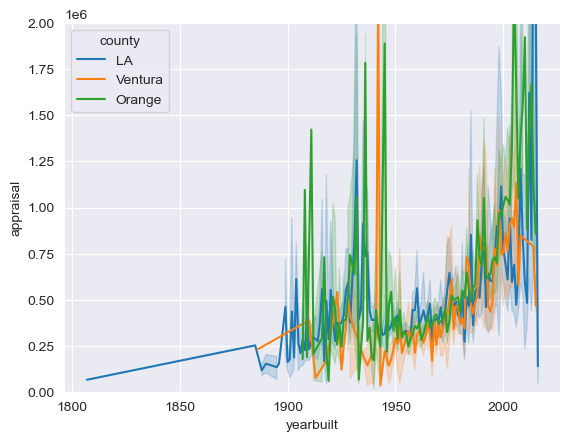

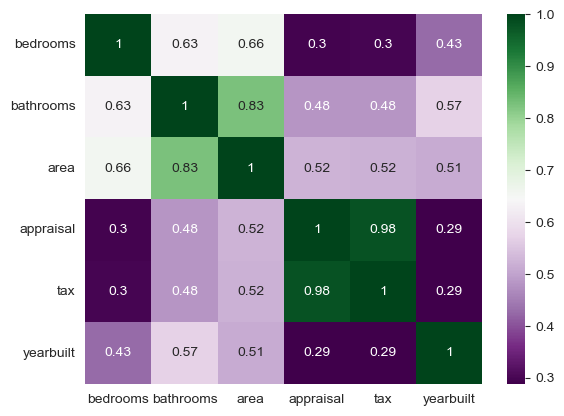

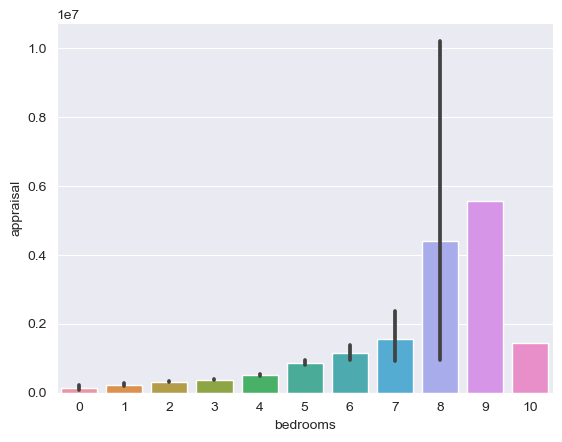

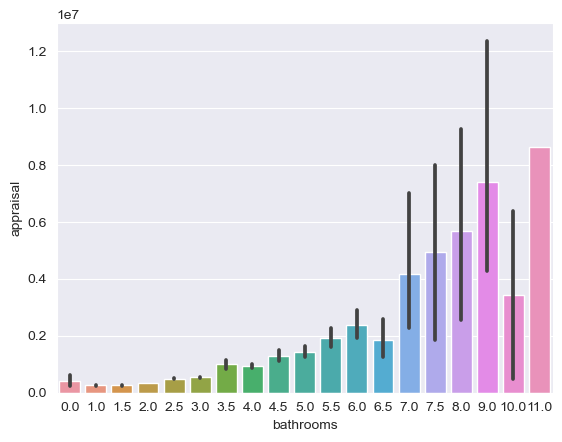

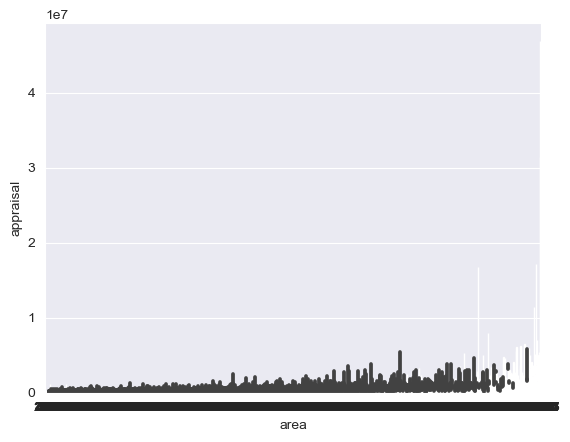

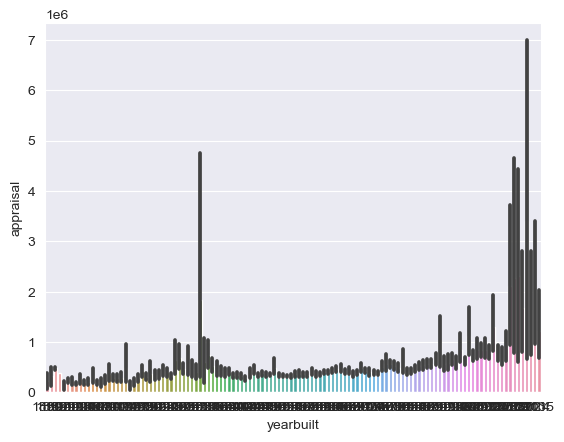

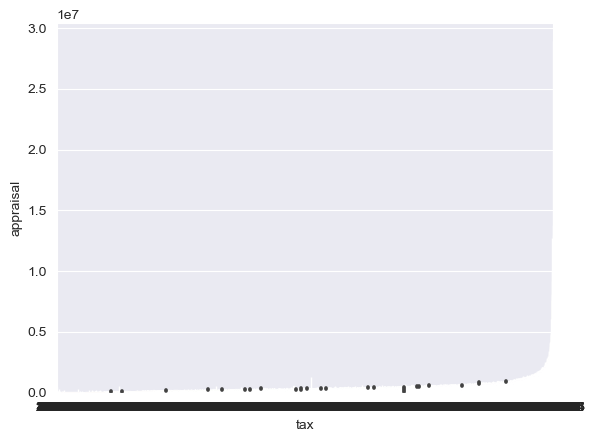

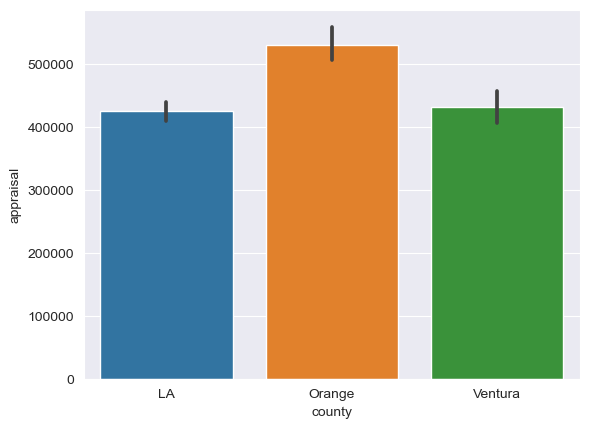

In [95]:
plot_categorical_and_continuous_vars(train)